<a href="https://colab.research.google.com/github/Viny2030/sklearn/blob/main/trees_hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importance of decision tree hyperparameters on generalization

In this notebook, we illustrate the importance of some key hyperparameters on
the decision tree; we demonstrate their effects on the classification and
regression problems we saw previously.

First, we load the classification and regression datasets.

Importancia de los hiperparámetros del árbol de decisión en la generalización
En este cuaderno, ilustramos la importancia de algunos hiperparámetros clave en el árbol de decisión; demostramos sus efectos en los problemas de clasificación y regresión que vimos anteriormente.

Primero, cargamos los conjuntos de datos de clasificación y regresión.

In [1]:
import pandas as pd

data_clf_columns = ["Culmen Length (mm),Culmen Depth (mm)"]
target_clf_column = "Species"
data_clf = pd.read_csv("https://raw.githubusercontent.com/Viny2030/datasets/refs/heads/main/penguins_classification.csv")

In [2]:
data_reg_columns = ["flipper_length_mm"]
target_reg_column = "body_mass_g"
data_reg = pd.read_csv("https://raw.githubusercontent.com/Viny2030/datasets/refs/heads/main/penguins.csv")

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

# **Nota**

Si desea obtener una descripción más detallada de este conjunto de datos, puede consultar la sección Apéndice - Descripción de conjuntos de datos al final de este MOOC.

## Create helper functions

We create some helper functions to plot the data samples as well as the
decision boundary for classification and the regression line for regression.

Crear funciones auxiliares
Creamos algunas funciones auxiliares para representar gráficamente las muestras de datos, así como el límite de decisión para la clasificación y la línea de regresión para la regresión.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay


def fit_and_plot_classification(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    if data[target_names].nunique() == 2:
        palette = ["tab:red", "tab:blue"]
    else:
        palette = ["tab:red", "tab:blue", "black"]
    DecisionBoundaryDisplay.from_estimator(
        model,
        data[feature_names],
        response_method="predict",
        cmap="RdBu",
        alpha=0.5,
    )
    sns.scatterplot(
        data=data,
        x=feature_names[0],
        y=feature_names[1],
        hue=target_names,
        palette=palette,
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")




In [5]:

def fit_and_plot_regression(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    data_test = pd.DataFrame(
        np.arange(data.iloc[:, 0].min(), data.iloc[:, 0].max()),
        columns=data[feature_names].columns,
    )
    target_predicted = model.predict(data_test)

    sns.scatterplot(
        x=data.iloc[:, 0], y=data[target_names], color="black", alpha=0.5
    )
    plt.plot(data_test.iloc[:, 0], target_predicted, linewidth=4)

## Effect of the `max_depth` parameter

The hyperparameter `max_depth` controls the overall complexity of a decision
tree. This hyperparameter allows to get a trade-off between an under-fitted
and over-fitted decision tree. Let's build a shallow tree and then a deeper
tree, for both classification and regression, to understand the impact of the
parameter.

We can first set the `max_depth` parameter value to a very low value.

# **Efecto del parámetro max_depth**
El hiperparámetro max_depth controla la complejidad general de un árbol de decisión. Este hiperparámetro permite obtener un equilibrio entre un árbol de decisión sobreajustado y uno poco ajustado. Construyamos un árbol poco profundo y luego un árbol más profundo, tanto para la clasificación como para la regresión, para comprender el impacto del parámetro.

Primero podemos establecer el valor del parámetro max_depth en un valor muy bajo.

In [6]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_reg = DecisionTreeRegressor(max_depth=max_depth)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay


def fit_and_plot_classification(model, data, feature_names, target_names):
    # The feature_names variable was passed as a single string
    # It needs to be a list of strings, each representing a column name
    model.fit(data[feature_names], data[target_names])
    if data[target_names].nunique() == 2:
        palette = ["tab:red", "tab:blue"]
    else:
        palette = ["tab:red", "tab:blue", "black"]
    DecisionBoundaryDisplay.from_estimator(
        model,
        data[feature_names],
        response_method="predict",
        cmap="RdBu",
        alpha=0.5,
    )
    sns.scatterplot(
        data=data,
        x=feature_names[0],  # Access the first feature name from the list
        y=feature_names[1],  # Access the second feature name from the list
        hue=target_names,
        palette=palette,
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

In [23]:
data_clf_columns = ["Culmen Length (mm),Culmen Depth (mm)"]

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay


def fit_and_plot_classification(model, data, feature_names, target_names):
    # The feature_names variable needs to be a list of strings
    # Each string represents a column name
    # If feature_names is a single string with comma-separated values, split it into a list
    if isinstance(feature_names, str):
        feature_names = [col.strip() for col in feature_names.split(',')]
    model.fit(data[feature_names], data[target_names])
    if data[target_names].nunique() == 2:
        palette = ["tab:red", "tab:blue"]
    else:
        palette = ["tab:red", "tab:blue", "black"]
    DecisionBoundaryDisplay.from_estimator(
        model,
        data[feature_names],
        response_method="predict",
        cmap="RdBu",
        alpha=0.5,
    )
    sns.scatterplot(
        data=data,
        x=feature_names[0],  # Access the first feature name from the list
        y=feature_names[1],  # Access the second feature name from the list
        hue=target_names,
        palette=palette,
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

In [25]:
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Shallow classification tree with max-depth of {max_depth}")

KeyError: "None of [Index(['Culmen Length (mm),Culmen Depth (mm)'], dtype='object')] are in the [columns]"

In [9]:
fit_and_plot_regression(
    tree_reg, data_reg, data_reg_columns, target_reg_column
)
_ = plt.title(f"Shallow regression tree with max-depth of {max_depth}")

ValueError: Input y contains NaN.

Now, let's increase the `max_depth` parameter value to check the difference by
observing the decision function.

In [10]:
max_depth = 30
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_reg = DecisionTreeRegressor(max_depth=max_depth)

In [11]:
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Deep classification tree with max-depth of {max_depth}")

KeyError: "None of [Index(['Culmen Length (mm),Culmen Depth (mm)'], dtype='object')] are in the [columns]"

In [12]:
fit_and_plot_regression(
    tree_reg, data_reg, data_reg_columns, target_reg_column
)
_ = plt.title(f"Deep regression tree with max-depth of {max_depth}")

ValueError: Input y contains NaN.

For both classification and regression setting, we observe that increasing the
depth makes the tree model more expressive. However, a tree that is too deep
may overfit the training data, creating partitions which are only correct for
"outliers" (noisy samples). The `max_depth` is one of the hyperparameters that
one should optimize via cross-validation and grid-search.

Tanto para la clasificación como para la regresión, observamos que aumentar la profundidad hace que el modelo de árbol sea más expresivo. Sin embargo, un árbol demasiado profundo puede sobreajustar los datos de entrenamiento, creando particiones que solo son correctas para "valores atípicos" (muestras ruidosas). La profundidad máxima es uno de los hiperparámetros que se deben optimizar mediante validación cruzada y búsqueda en cuadrícula.

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": np.arange(2, 10, 1)}
tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
tree_reg = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid)

In [14]:
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(
    f"Optimal depth found via CV: {tree_clf.best_params_['max_depth']}"
)

KeyError: "None of [Index(['Culmen Length (mm),Culmen Depth (mm)'], dtype='object')] are in the [columns]"

In [15]:
fit_and_plot_regression(
    tree_reg, data_reg, data_reg_columns, target_reg_column
)
_ = plt.title(
    f"Optimal depth found via CV: {tree_reg.best_params_['max_depth']}"
)

ValueError: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1377, in fit
    super()._fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 252, in _fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 648, in _validate_data
    y = check_array(y, input_name="y", **check_y_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1064, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input y contains NaN.


With this example, we see that there is not a single value that is optimal for
any dataset. Thus, this parameter is required to be optimized for each
application.

## Other hyperparameters in decision trees

The `max_depth` hyperparameter controls the overall complexity of the tree.
This parameter is adequate under the assumption that a tree is built
symmetrically. However, there is no reason why a tree should be symmetrical.
Indeed, optimal generalization performance could be reached by growing some of
the branches deeper than some others.

We build a dataset where we illustrate this asymmetry. We generate a dataset
composed of 2 subsets: one subset where a clear separation should be found by
the tree and another subset where samples from both classes are mixed. It
implies that a decision tree needs more splits to classify properly samples
from the second subset than from the first subset.

Con este ejemplo, vemos que no existe un único valor que sea óptimo para cualquier conjunto de datos. Por lo tanto, se requiere optimizar este parámetro para cada aplicación.

Otros hiperparámetros en árboles de decisión
El hiperparámetro max_depth controla la complejidad general del árbol. Este parámetro es adecuado bajo el supuesto de que un árbol se construye simétricamente. Sin embargo, no hay ninguna razón por la que un árbol deba ser simétrico. De hecho, se podría alcanzar un rendimiento de generalización óptimo haciendo crecer algunas de las ramas más profundamente que otras.

Creamos un conjunto de datos donde ilustramos esta asimetría. Generamos un conjunto de datos compuesto por 2 subconjuntos: un subconjunto donde el árbol debe encontrar una separación clara y otro subconjunto donde se mezclan muestras de ambas clases. Esto implica que un árbol de decisión necesita más divisiones para clasificar correctamente las muestras del segundo subconjunto que las del primer subconjunto.



In [ ]:
from sklearn.datasets import make_blobs

data_clf_columns = ["Feature #0", "Feature #1"]
target_clf_column = "Class"

# Blobs that are interlaced
X_1, y_1 = make_blobs(
    n_samples=300, centers=[[0, 0], [-1, -1]], random_state=0
)
# Blobs that can be easily separated
X_2, y_2 = make_blobs(n_samples=300, centers=[[3, 6], [7, 0]], random_state=0)

X = np.concatenate([X_1, X_2], axis=0)
y = np.concatenate([y_1, y_2])
data_clf = np.concatenate([X, y[:, np.newaxis]], axis=1)
data_clf = pd.DataFrame(
    data_clf, columns=data_clf_columns + [target_clf_column]
)
data_clf[target_clf_column] = data_clf[target_clf_column].astype(np.int32)

In [16]:
sns.scatterplot(
    data=data_clf,
    x=data_clf_columns[0],
    y=data_clf_columns[1],
    hue=target_clf_column,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Synthetic dataset")

IndexError: list index out of range

We first train a shallow decision tree with `max_depth=2`. We would expect
this depth to be enough to separate the blobs that are easy to separate.

Primero, entrenamos un árbol de decisión superficial con max_depth=2. Esperamos que esta profundidad sea suficiente para separar los blobs que son fáciles de separar.

In [17]:
max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Decision tree with max-depth of {max_depth}")

KeyError: "None of [Index(['Culmen Length (mm),Culmen Depth (mm)'], dtype='object')] are in the [columns]"

As expected, we see that the blue blob in the lower right and the red blob on
the top are easily separated. However, more splits are required to better
split the blob were both blue and red data points are mixed.

Como era de esperar, vemos que la mancha azul en la parte inferior derecha y la mancha roja en la parte superior se separan fácilmente. Sin embargo, se requieren más divisiones para dividir mejor la mancha donde se mezclan los puntos de datos azules y rojos.

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

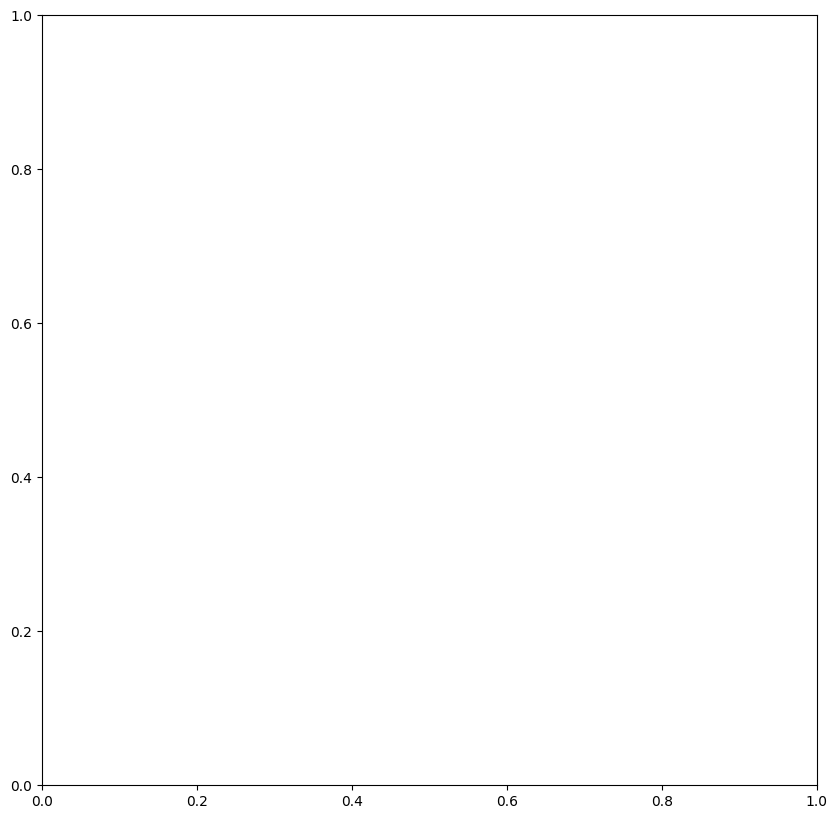

In [18]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

We see that the right branch achieves perfect classification. Now, we increase
the depth to check how the tree grows.

Vemos que la rama derecha consigue una clasificación perfecta. Ahora, aumentamos la profundidad para comprobar cómo crece el árbol.

In [19]:
max_depth = 6
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Decision tree with max-depth of {max_depth}")

KeyError: "None of [Index(['Culmen Length (mm),Culmen Depth (mm)'], dtype='object')] are in the [columns]"

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

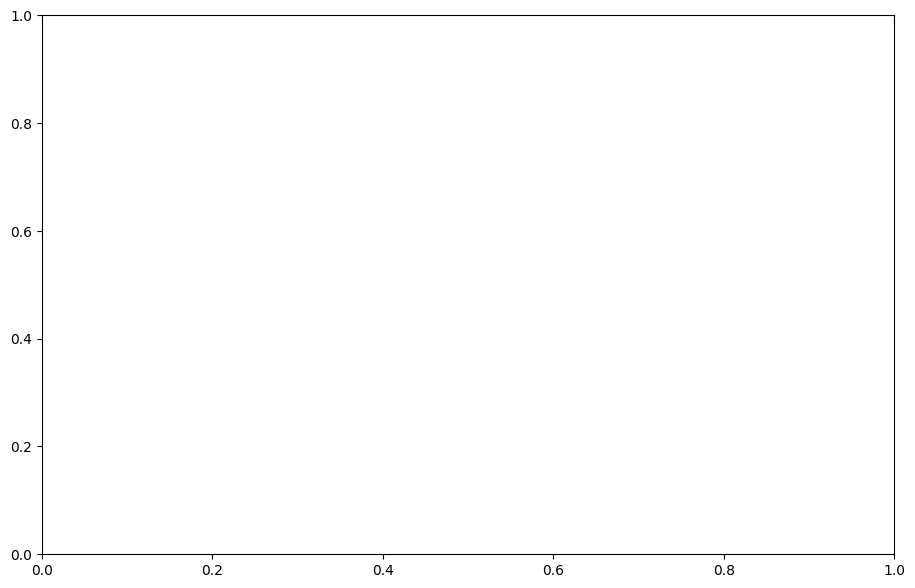

In [20]:
_, ax = plt.subplots(figsize=(11, 7))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

As expected, the left branch of the tree continue to grow while no further
splits were done on the right branch. Fixing the `max_depth` parameter would
cut the tree horizontally at a specific level, whether or not it would be more
beneficial that a branch continue growing.

The hyperparameters `min_samples_leaf`, `min_samples_split`, `max_leaf_nodes`,
or `min_impurity_decrease` allow growing asymmetric trees and apply a
constraint at the leaves or nodes level. We check the effect of
`min_samples_leaf`.

Como se esperaba, la rama izquierda del árbol siguió creciendo mientras que no se realizaron más divisiones en la rama derecha. La corrección del parámetro max_depth cortaría el árbol horizontalmente en un nivel específico, independientemente de si sería más beneficioso o no que una rama siguiera creciendo.

Los hiperparámetros min_samples_leaf, min_samples_split, max_leaf_nodes o min_impurity_decrease permiten hacer crecer árboles asimétricos y aplican una restricción en el nivel de hojas o nodos. Comprobamos el efecto de min_samples_leaf.

In [21]:
min_samples_leaf = 60
tree_clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(
    f"Decision tree with leaf having at least {min_samples_leaf} samples"
)

KeyError: "None of [Index(['Culmen Length (mm),Culmen Depth (mm)'], dtype='object')] are in the [columns]"

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

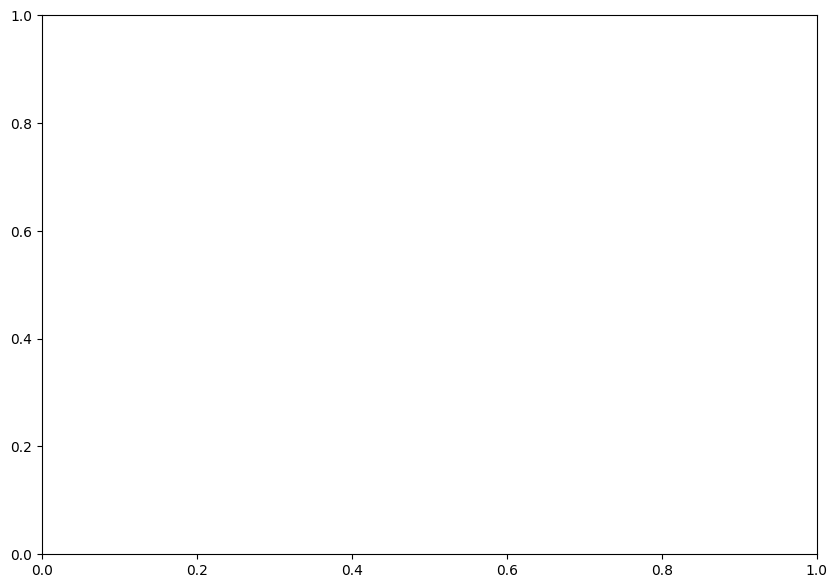

In [22]:
_, ax = plt.subplots(figsize=(10, 7))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

This hyperparameter allows to have leaves with a minimum number of samples and
no further splits are searched otherwise. Therefore, these hyperparameters
could be an alternative to fix the `max_depth` hyperparameter.

Este hiperparámetro permite tener hojas con un número mínimo de muestras y no se buscan más divisiones en caso contrario. Por lo tanto, estos hiperparámetros podrían ser una alternativa para corregir el hiperparámetro max_depth.